## Chapter 10

In [1]:
library(ISLR)

Warning message:
"package 'ISLR' was built under R version 3.6.3"

## Problem 2

(a) On the basis of this dissimilarity matrix, sketch the dendrogram
that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the
height at which each fusion occurs, as well as the observations
corresponding to each leaf in the dendrogram.

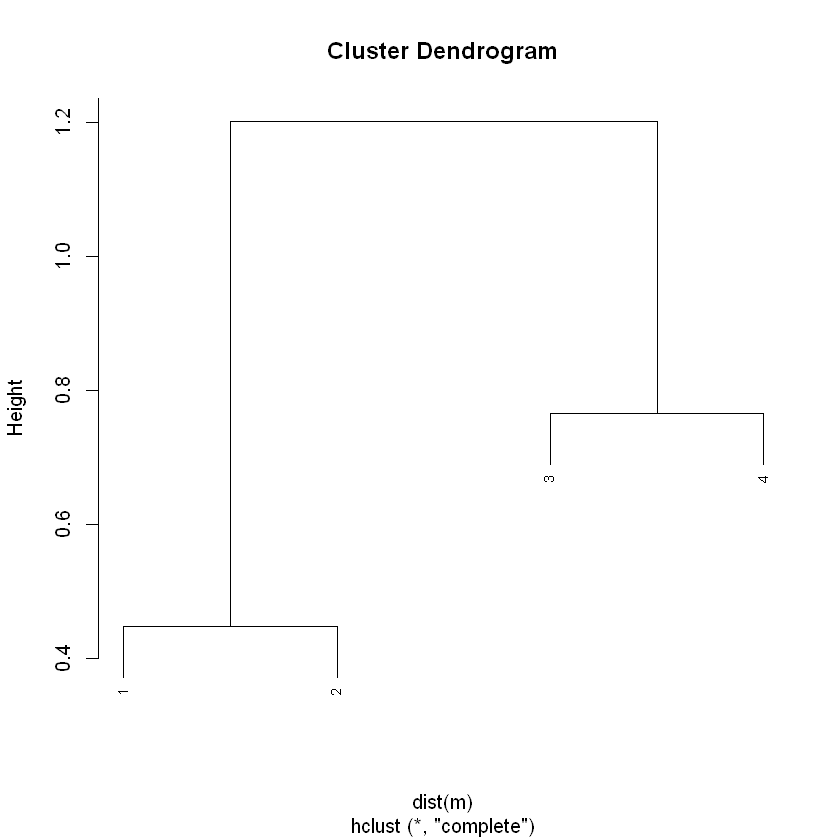

In [117]:
m = matrix(c(0, 0.3, 0.4, 0.7, 
             0.3, 0, 0.5, 0.8,
             0.4, 0.5, 0.0, 0.45,
             0.7, 0.8, 0.45, 0.0), nrow = 4)
hc.complete =hclust(dist(m), method="complete")
plot(hc.complete, cex = 0.7)

(b) Repeat (a), this time using single linkage clustering

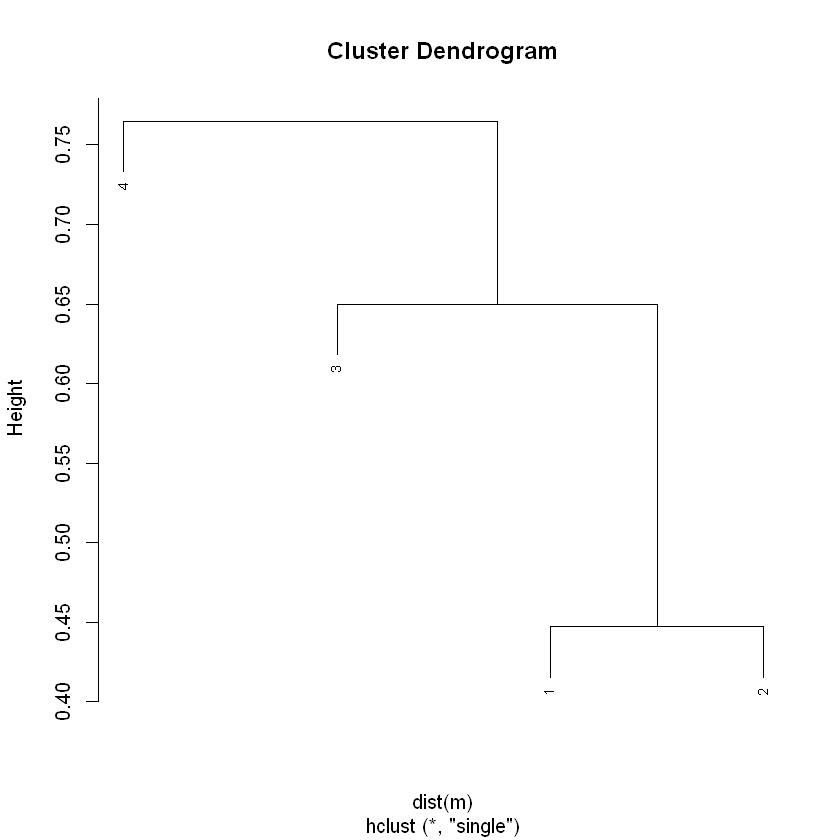

In [118]:
hc.single =hclust(dist(m), method="single")
plot(hc.single, cex = 0.7)

(c) Suppose that we cut the dendogram obtained in (a) such that
two clusters result. Which observations are in each cluster?

1 and 2 in claser 1, 3 and 4 in cluster 2

(d) Suppose that we cut the dendogram obtained in (b) such that
two clusters result. Which observations are in each cluster?

4 in 2, 1,2,3 in 1

(e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be
swapped without changing the meaning of the dendrogram. Draw
a dendrogram that is equivalent to the dendrogram in (a), for
which two or more of the leaves are repositioned, but for which
the meaning of the dendrogram is the same.

swap labels 1 with 2 and 3 with 4

In [195]:
kmean_results=function(x, K){
    set.seed(4)
    km.out=kmeans (x, K, nstart =20)
    plot(x, col=(km.out3$cluster +1), main="K-Means Clustering
    Results", xlab="", ylab="", pch=20, cex=2)
    print(table(true.labels, km.out$cluster))
    print(km.out)
}

## Problem 7

In the chapter, we mentioned the use of correlation-based distance
and Euclidean distance as dissimilarity measures for hierarchical clustering. It turns out that these two measures are almost equivalent: if
each observation has been centered to have mean zero and standard
deviation one, and if we let rij denote the correlation between the ith
and jth observations, then the quantity 1 − rij is proportional to the
squared Euclidean distance between the ith and jth observations.
On the USArrests data, show that this proportionality holds.

In [2]:
head(USArrests)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [3]:
dim(USArrests)

[1] 50  4

In [4]:
apply(USArrests, 2, mean)

Murder  Assault UrbanPop     Rape 
   7.788  170.760   65.540   21.232

In [13]:
df=scale(USArrests)
set.seed(3)

In [22]:
matd=dist(df)^2

In [23]:
matc=as.dist((1-t(cor(t(df)))))
matc

                    Alabama       Alaska      Arizona     Arkansas   California
Alaska         0.7138307819                                                    
Arizona        1.4465947843 0.8307245898                                       
Arkansas       0.0877416809 0.3672785641 1.1766554172                          
California     1.8659223310 0.8137128067 0.2949017541 1.5863126412             
Colorado       1.6872310193 0.5155556175 0.5983808782 1.3709254337 0.1146234010
Connecticut    1.7135870980 1.8617870018 0.7759582405 1.8986422868 0.6631595707
Delaware       1.1428182422 1.4788738310 0.3411540927 1.1920258659 0.8973252909
Florida        0.1049203486 0.7861031722 1.0409926090 0.1421425885 1.7009808084
Georgia        0.1162516972 0.7367030469 1.7839695560 0.2511757376 1.8595181408
Hawaii         1.8059006680 1.5764752423 1.1458813737 1.9369776851 0.5651593270
Idaho          1.4792354141 0.7916559296 0.0025732601 1.1919825459 0.2520373794
Illinois       1.3090956230 1.8653950071

In [26]:
r=matc/matd
summary(r)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000086 0.069135 0.133943 0.234193 0.262589 4.887686 

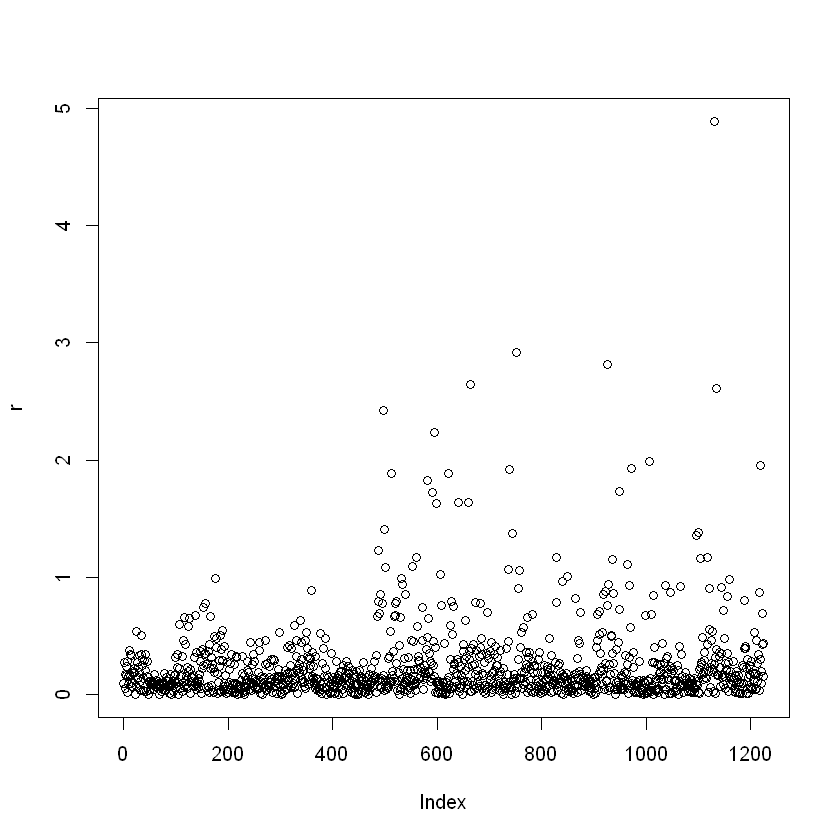

In [27]:
plot(r)

## Problem 8

In Section 10.2.3, a formula for calculating PVE was given in Equation 10.8. We also saw that the PVE can be obtained using the sdev
output of the prcomp() function.
On the USArrests data, calculate PVE in two ways:

(a) Using the sdev output of the prcomp() function, as was done in
Section 10.2.3.

In [28]:
pr.out=prcomp(USArrests, scale=TRUE)
summary (pr.out)

Importance of components:
                          PC1    PC2     PC3     PC4
Standard deviation     1.5749 0.9949 0.59713 0.41645
Proportion of Variance 0.6201 0.2474 0.08914 0.04336
Cumulative Proportion  0.6201 0.8675 0.95664 1.00000

In [79]:
pve =pr.out$sdev^2/sum(pr.out$sdev^2)
pve

[1] 0.62006039 0.24744129 0.08914080 0.04335752

(b) By applying Equation 10.8 directly. That is, use the prcomp()
function to compute the principal component loadings. Then,
use those loadings in Equation 10.8 to obtain the PVE.

In [86]:
pr.out$rotation

,PC1,PC2,PC3,PC4
Murder,-0.5358995,0.4181809,-0.3412327,0.64922780
Assault,-0.5831836,0.1879856,-0.2681484,-0.74340748
UrbanPop,-0.2781909,-0.8728062,-0.3780158,0.13387773
Rape,-0.5434321,-0.1673186,0.8177779,0.08902432


In [96]:
apply((as.matrix(scale(USArrests)) %*% pr.out$rotation)^2, 2, sum)/sum(apply(as.matrix(scale(USArrests))^2, 2, sum))

PC1        PC2        PC3        PC4 
0.62006039 0.24744129 0.08914080 0.04335752

## Problem 9

Consider the USArrests data. We will now perform hierarchical clustering on the states.

(a) Using hierarchical clustering with complete linkage and
Euclidean distance, cluster the states

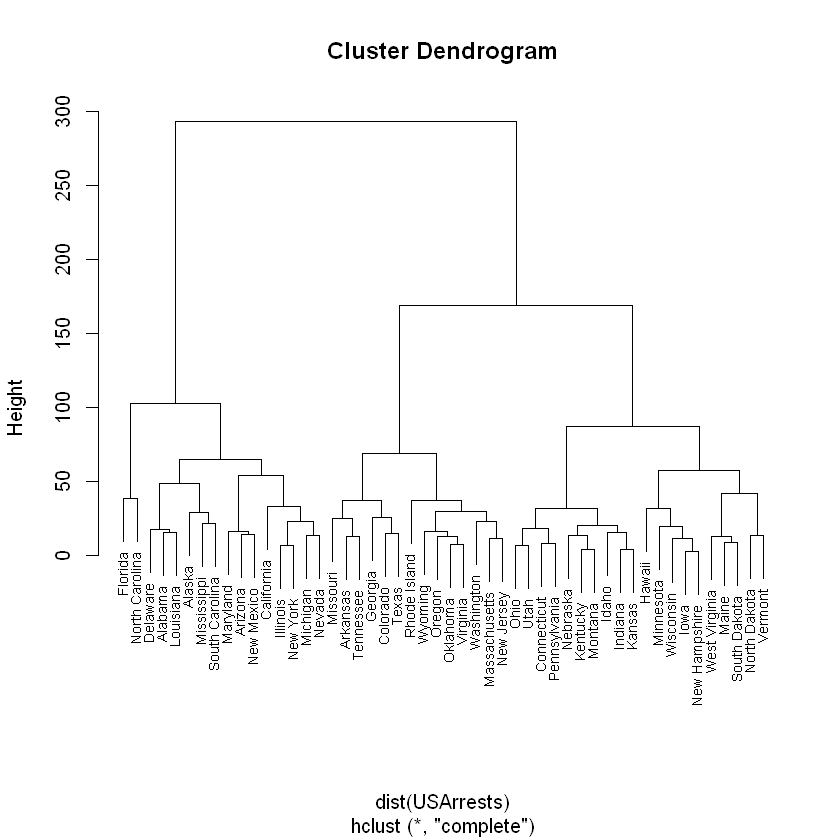

In [106]:
hc.complete =hclust(dist(USArrests), method="complete")
plot(hc.complete, cex = 0.7)

(b) Cut the dendrogram at a height that results in three distinct
clusters. Which states belong to which clusters?

In [111]:
cutree(hc.complete , 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              1              1              2 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              1              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              3              1              2 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              1              3              2 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             1              1              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             2              2              3              2              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              2              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             2              2              3              3              2

(c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one

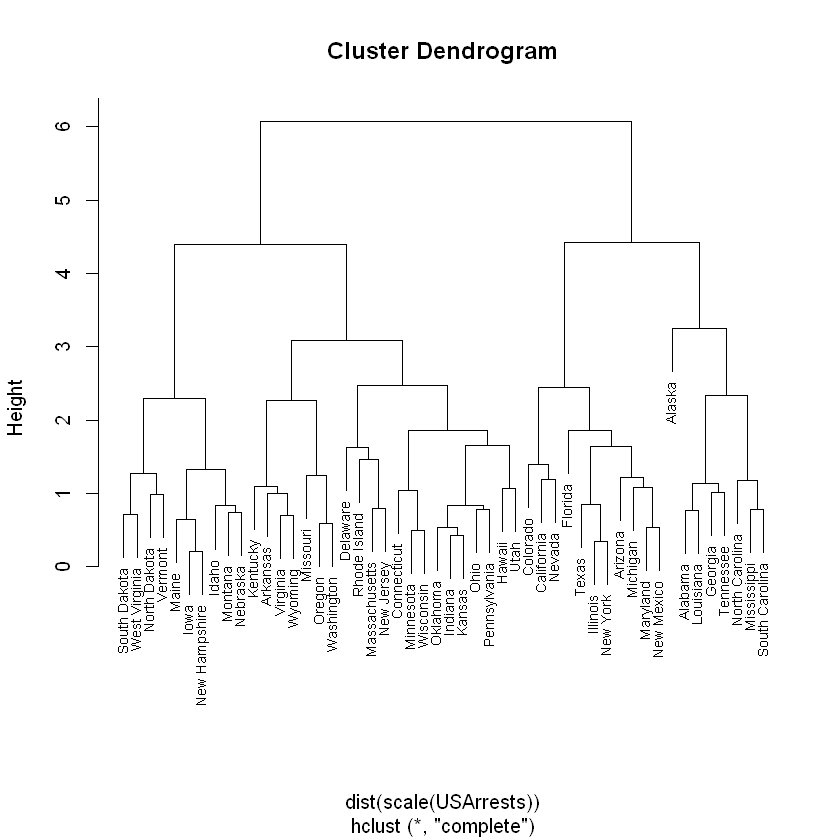

In [112]:
hc.complete =hclust(dist(scale(USArrests)), method="complete")
plot(hc.complete, cex = 0.7)

 (d) What effect does scaling the variables have on the hierarchical
clustering obtained? In your opinion, should the variables be
scaled before the inter-observation dissimilarities are computed?
Provide a justification for your answer.

In [115]:
cutree(hc.complete, 3)

Alabama         Alaska        Arizona       Arkansas     California 
             1              1              2              3              2 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             2              3              3              2              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             3              3              2              3              3 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             3              3              1              3              2 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             3              2              3              1              3 
       Montana       Nebraska         Nevada  New Hampshire     New Jersey 
             3              3              2              3              3 
    New Mexico       New York North Carolina   North Dakota           Ohio 
             2              2              1              3              3 
      Oklahoma         Oregon   Pennsylvania   Rhode Island South Carolina 
             3              3              3              3              1 
  South Dakota      Tennessee          Texas           Utah        Vermont 
             3              1              2              3              3 
      Virginia     Washington  West Virginia      Wisconsin        Wyoming 
             3              3              3              3              3

It depends on what we are scaling, how the features that we are scaling change. In this case scaling is good.

## Problem 10

In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of
three classes (i.e. 60 observations total), and 50 variables.

In [159]:
set.seed(2)
x=matrix(rnorm (60*50), ncol=50)
x[1:20,]=x[1:20,]+3
x[21:40,]=x[21:40,]-1
x[41:60,]=x[41:60,]-4

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use a different color to indicate
the observations in each of the three classes. If the three classes
appear separated in this plot, then continue on to part (c). If
not, then return to part (a) and modify the simulation so that
there is greater separation between the three classes. Do not
continue to part (c) until the three classes show at least some
separation in the first two principal component score vectors.

In [160]:
pr.out=prcomp(x, scale=TRUE)
pr.out

Standard deviations (1, .., p=50):
 [1] 6.69338631 0.57595868 0.56612374 0.55429101 0.53542701 0.52505233
 [7] 0.51745677 0.47809797 0.47539240 0.45775412 0.45521824 0.44798473
[13] 0.42230376 0.40309315 0.40020577 0.39052632 0.37762072 0.36094775
[19] 0.34149279 0.33291494 0.32541737 0.31969365 0.30746006 0.30257276
[25] 0.28471587 0.27072453 0.25954320 0.25434031 0.24769009 0.23164642
[31] 0.21948650 0.20741311 0.19520058 0.18930551 0.18277509 0.17574249
[37] 0.16403124 0.15219679 0.13934531 0.12576966 0.12266652 0.11139511
[43] 0.10079676 0.09408832 0.08744127 0.08006424 0.06610121 0.05931556
[49] 0.05571078 0.03587400

Rotation (n x k) = (50 x 50):
             PC1          PC2           PC3          PC4           PC5
 [1,] -0.1391228 -0.318967538  0.0011191278 -0.100113408  0.4100796598
 [2,] -0.1386133  0.048326843  0.2860930996 -0.352883582 -0.0525899930
 [3,] -0.1423208 -0.076410071 -0.1278046597  0.128378472 -0.1090291991
 [4,] -0.1403752 -0.122342702 -0.1408479499 -0.29078785

In [163]:
#First 2 PCA vectors
v1=pr.out$x[,1]
v2=pr.out$x[,1]

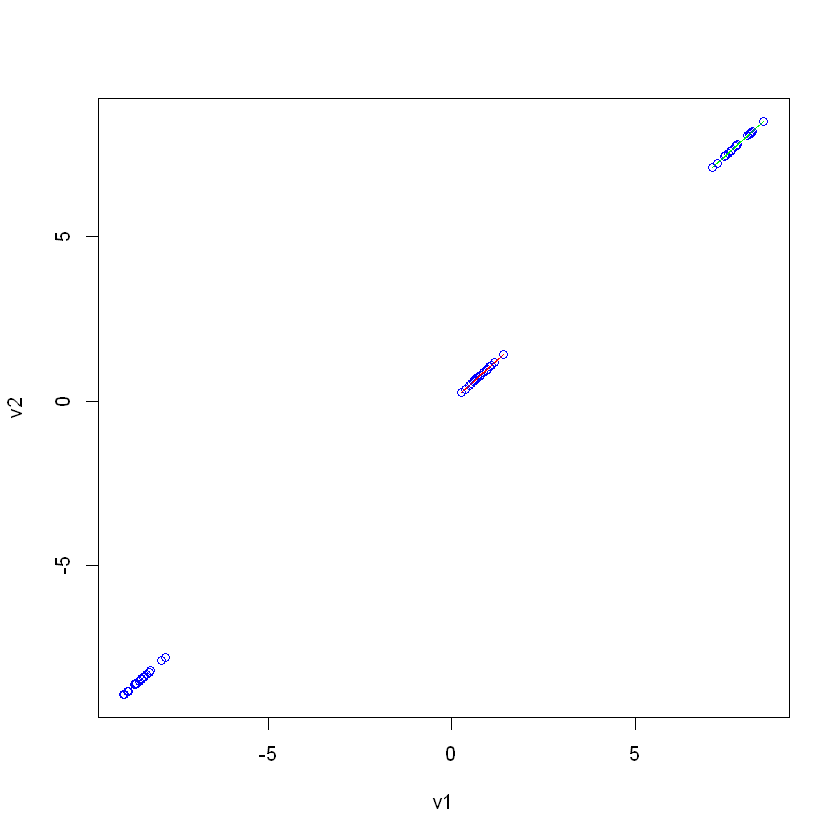

In [164]:
plot(v1, v2, col="blue")
lines(v1[21:40], v2[21:40], col="red")
lines(v1[41:60], v2[41:60], col="green")


(c) Perform K-means clustering of the observations with K = 3.
How well do the clusters that you obtained in K-means clustering compare to the true class labels?

           
true.labels  1  2  3
          1  0 20  0
          2  0  0 20
          3 20  0  0
K-means clustering with 3 clusters of sizes 20, 20, 20

Cluster means:
       [,1]      [,2]       [,3]       [,4]      [,5]       [,6]       [,7]
1 -3.904746 -3.654609 -4.1931147 -3.9456293 -3.726721 -3.5185880 -4.3856053
2  3.195461  2.827707  3.1709802  2.7536095  3.267103  3.0131972  3.2283581
3 -1.000282 -1.271631 -0.9307926 -0.7988056 -1.081285 -0.4213851 -0.7310787
       [,8]       [,9]      [,10]      [,11]     [,12]      [,13]     [,14]
1 -4.046083 -3.6050521 -4.2090912 -4.3178003 -3.582993 -4.0916893 -3.789273
2  3.117302  2.7175142  3.3391202  2.9858313  2.946365  3.1988505  3.256478
3 -1.138568 -0.7830883 -0.4795741 -0.9226009 -1.159897 -0.9372341 -1.311095
       [,15]     [,16]     [,17]     [,18]     [,19]      [,20]     [,21]
1 -3.8574617 -4.096141 -3.891028 -3.674750 -3.815597 -3.9726873 -4.284626
2  2.9587269  3.498140  2.765530  3.407919  2.934739  2.9160787  2.809908
3 -

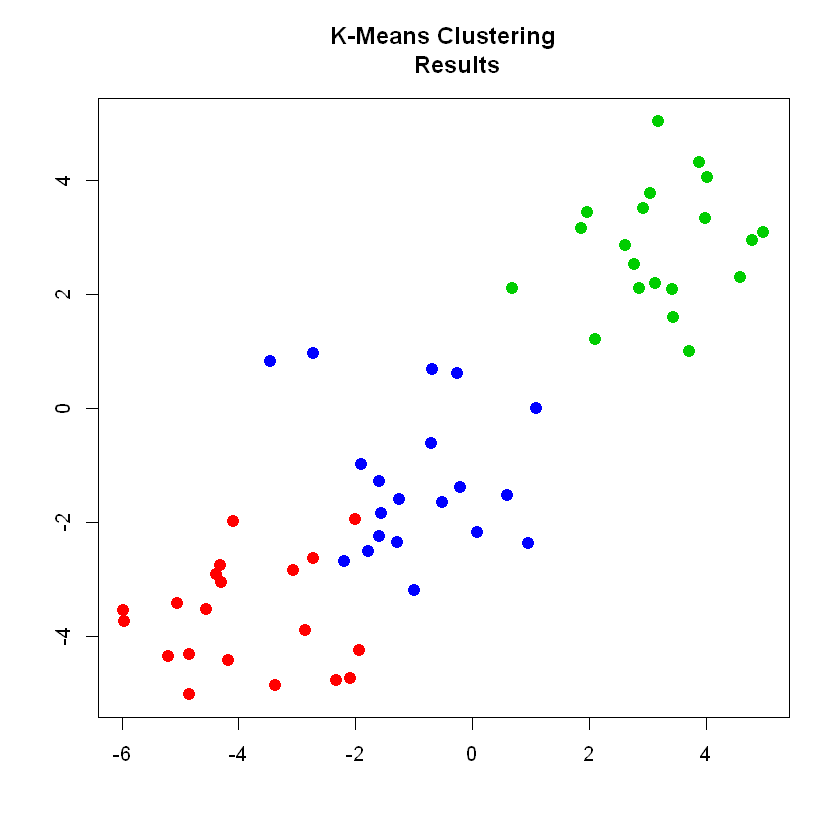

In [198]:
kmean_results(x, 3)

In this case labels are assigned perfectly

(d) Perform K-means clustering with K = 2. Describe your results.

           
true.labels  1  2
          1  0 20
          2 20  0
          3 20  0
K-means clustering with 2 clusters of sizes 40, 20

Cluster means:
       [,1]      [,2]      [,3]      [,4]      [,5]      [,6]      [,7]
1 -2.452514 -2.463120 -2.561954 -2.372217 -2.404003 -1.969987 -2.558342
2  3.195461  2.827707  3.170980  2.753610  3.267103  3.013197  3.228358
       [,8]      [,9]     [,10]     [,11]     [,12]     [,13]     [,14]
1 -2.592326 -2.194070 -2.344333 -2.620201 -2.371445 -2.514462 -2.550184
2  3.117302  2.717514  3.339120  2.985831  2.946365  3.198850  3.256478
      [,15]    [,16]     [,17]     [,18]     [,19]     [,20]     [,21]
1 -2.420935 -2.58865 -2.536942 -2.596674 -2.471466 -2.387406 -2.659974
2  2.958727  3.49814  2.765530  3.407919  2.934739  2.916079  2.809908
      [,22]     [,23]     [,24]     [,25]     [,26]     [,27]     [,28]
1 -2.318307 -2.678546 -2.324374 -2.469966 -2.431867 -2.487314 -2.413126
2  3.352648  3.052127  2.961972  3.000430  2.971991  3.05270

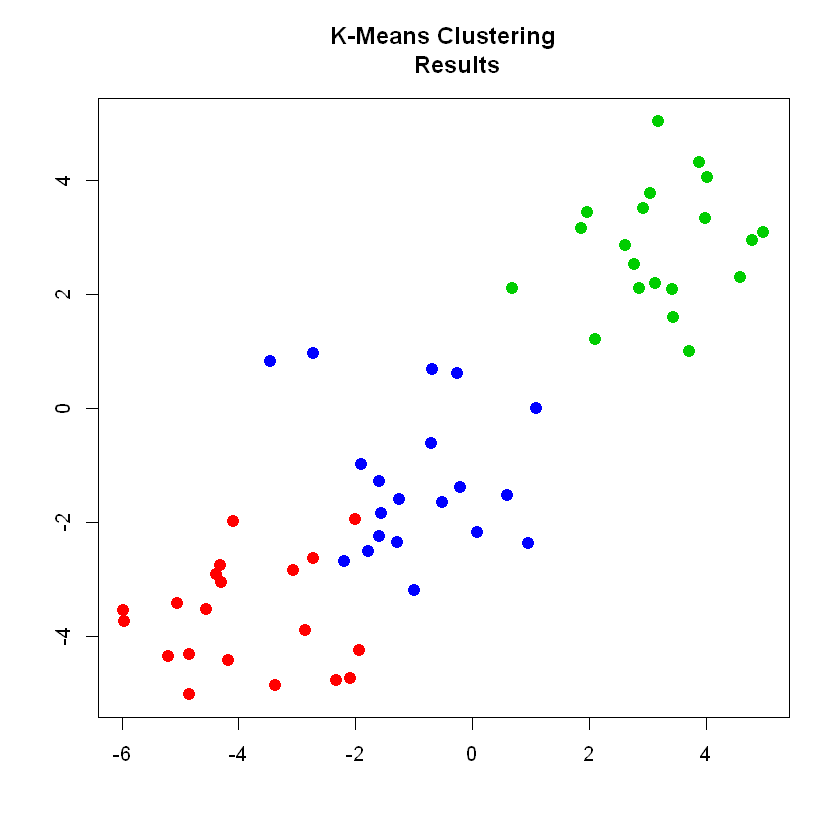

In [196]:
kmean_results(x, 2)

In this case two closest classes are assigned to one label.

(e) Now perform K-means clustering with K = 4, and describe your
results.

           
true.labels  1  2  3  4
          1  0  0 20  0
          2  0 20  0  0
          3  8  0  0 12
K-means clustering with 4 clusters of sizes 8, 20, 20, 12

Cluster means:
       [,1]      [,2]       [,3]       [,4]      [,5]       [,6]       [,7]
1 -4.600442 -3.644030 -3.9388863 -4.2516580 -3.366048 -3.4438471 -4.0162104
2 -1.000282 -1.271631 -0.9307926 -0.7988056 -1.081285 -0.4213851 -0.7310787
3  3.195461  2.827707  3.1709802  2.7536095  3.267103  3.0131972  3.2283581
4 -3.440949 -3.661662 -4.3626002 -3.7416101 -3.967169 -3.5684152 -4.6318686
       [,8]       [,9]      [,10]      [,11]     [,12]      [,13]     [,14]
1 -3.633520 -3.7978359 -4.4627247 -3.8909502 -3.764000 -3.8802383 -4.192165
2 -1.138568 -0.7830883 -0.4795741 -0.9226009 -1.159897 -0.9372341 -1.311095
3  3.117302  2.7175142  3.3391202  2.9858313  2.946365  3.1988505  3.256478
4 -4.321125 -3.4765295 -4.0400022 -4.6023670 -3.462322 -4.2326567 -3.520679
       [,15]     [,16]     [,17]     [,18]     [,19]      

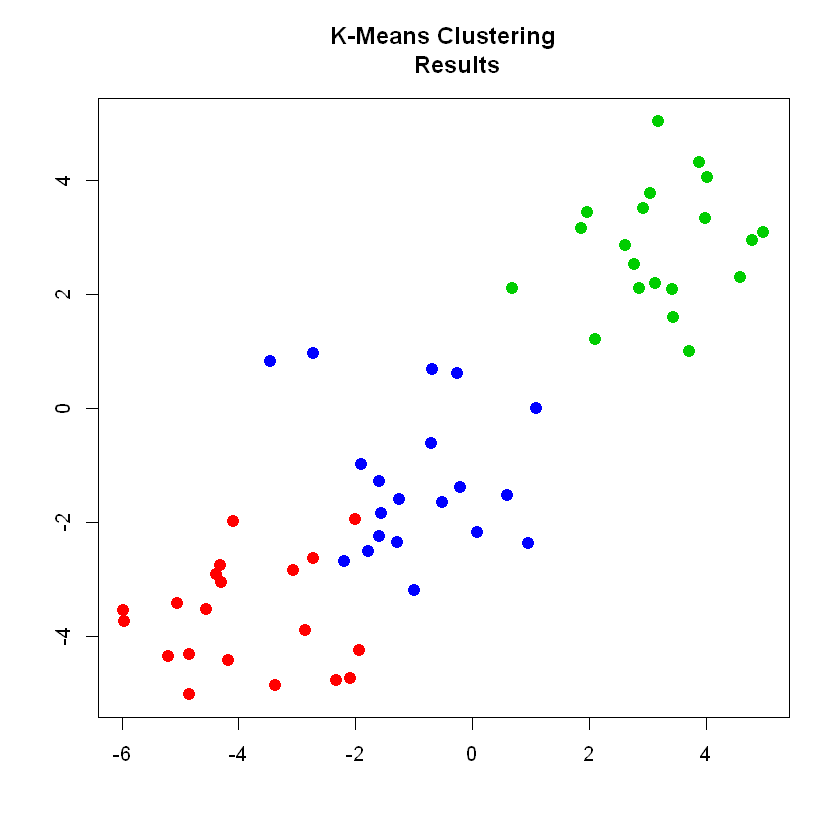

In [199]:
kmean_results(x, 4)

In this case one of classes got splitted.